# Metoda LIME
## Opis danych
Dane pochodzą z bazy o nazwie TUH Abnormal EEG Corpus (https://isip.piconepress.com/projects/tuh_eeg/downloads/tuh_eeg_abnormal/v2.0.0/). Są to zapisy sygnału EEG z jednego szpitala sklasyfikowane jako prawidłowe lub nieprawidłowe.

## Podstawowe informacje ułatwiające dalsze zrozumienie:
Do badania użyto standardowego układu elektrod 10-20, wygląda on następująco:

<IMG src="img/10-20.png" width=500>

Do każdego sygnału EEG jest załączony opis lekarza, który nie zawsze używa konkretnych nazw elektrod, tylko bardziej ogólne określenia.

* Parzyste numery elektrod są po prawej stronie, nieparzyste - po lewej
* Geneza literek w nazwach: pre-frontal (Fp), frontal (F), temporal (T), parietal (P), occipital (O), central (C)
* Zwolnienia w obszarach mózgu, K kompleksy - niskie częstotliwości
* Vertex, sharp waves - wyższe częstotliwości
* Wrzeciona snu (spindles) 12-16 Hz
    
## Drzewo decyzyjne
### Wybór cech
Lekarze oceniali sygnały EEG używając jedynie oczu i linijek - skupiali się więc na mocy danych częstotliwości w danych kanałach. Aby móc porównywać moje wyjaśnienia z ich opisami, wybrałam te same cechy. Dla każdego kanału obliczyłam moc sygnału w następujących pasmach częstotliwości:

* 0-2 Hz (delta)
* 1-3 Hz (delta)
* 2-4 Hz (delta)
* 3-6 Hz (theta)
* 4-8 Hz (theta)
* 6-10 Hz (alfa)
* 8-13 Hz (alfa)
* 10-15 Hz (beta)
* 13-18 Hz (beta)
* 15-21 Hz (beta)
* 18-24 Hz (beta)
* 21-27 Hz (beta)
* 24-30 Hz (gamma)
* 27-39 Hz (gamma)
* 30-49 Hz (gamma)
Uzyskałam w ten sposób 15x21=315 cech. Nie stosowałam żadnych redukcji cech, ponieważ chciałam uzyskać pełen obraz dla wszystkich cech.

Wyniki modelu na zbiorze ewaluacyjnym
* ACC - 0.84
* MCC - 0.67
* Spec - 0.87
* Sens - 0.85
### Wyjaśnianie konkretnych przypadków:
#### Przypadek pierwszy, klasyfikator poprawnie stwierdził nieprawidłowość EEG.
* Fragment opisu lekarza: "Abnormal EEG due to marked slowing from the right, right frontal temporal periodic sharp activity, generalized slowing."

* Rysunek przedstawiający istotność cech jako mapa cieplna: 
<IMG src="img/sub_00006531_065.png">    
    
* Rysunek przedstawiający istotność cech jako standardowy wykres słupkowy: 
    
<IMG src="img/sub_00006531_065_bar.png">    
    
Po pierwsze, wyraźnie widać że dużą rolę odegrały elektrody znajdujące się w prawej części mózgu. Wyraźne zwolnienie (dla fal 1-3 Hz) widać dla prawych elektrod F4, P4, O2, T4, T6, A2. Oczywiście pojawiają się też zwolnienia w lewej części, ale znacznie bardziej wyróżnia się prawa część. Elektroda Pz odgrywa kluczową rolę w wielu różnych klasyfikatorach. Może być tak dlatego że jest po prostu w centrum, ale nie mam wystarczającej wiedzy aby zagłębić się w ten temat.Jest też mowa o 'right frontal temporal periodic sharp activity' które doskonale widać w częśtotliwościach beta/gamma głównie dla elektrod F4 i T6. Dla elektrody T4 i T6 istotność w częstotliwości 10-15 Hz może podpadać pod sharp activity, ale nie jestem pewna. Może to też być coś co po prostu faktycznie nie powinno być istotne, albo jest i lekarz tego nie zauważył.
#### Przypadek drugi, klasyfikator poprawnie stwierdził nieprawidłowość EEG.
* Fragment opisu lekarza: "Abnormal EEG due to replacement of normal background primarily with a beta frequency pattern, superimposed asymmetry with relatively less beta and more suppression in the left particularly in the posterior quadrant"
* Rysunek przedstawiający istotność cech cech jako mapa cieplna: 
    
<IMG src="img/sub_00007383_073.png">     
    
* Rysunek przedstawiający istotność cech jako standardowy wykres słupkowy: 
    
<IMG src="img/sub_00007383_073_bar.png">     
    
W tym przypadku klasyfikator najbardziej zwrócił uwagę na odznaczającą się betę w kanałach T4 i T3 (beta może być uznawana od 13 Hz, dlatego nachodzi na alfę na tym rysunku), mimo że w opisie jest mowa o terenach 'posterior'. Elektroda Pz jak wyżej, po prostu jest często brana pod uwagę, ale też pasuje do opisu ponieważ jest elektrodą w terenie 'posterior' i klasyfikator zwrócił uwagę na betę w tej elektrodzie. T4 dla częstotliwości 0-2 Hz nie pojawia się w opisie lekarza, więc znowu albo to błąd klasyfikatora, albo błąd lekarza.

#### Przypadek trzeci, klasyfikator niepoprawnie stwierdził nieprawidłowość EEG.
* Fragment opisu lekarza: "The majority of the record includes stage II sleep with vertex, K complexes and spindles. Little testing is performed to assess for cognitive testing. The patient is stimulated and when she is awake, the background includes a well-defined, 9.5 Hz alpha rhythm. IMPRESSION: Normal EEG."
* Rysunek przedstawiający istotność cech: 

<IMG src="img/sub_00006312_063.png">     
    
* Rysunek przedstawiający istotność cech jako standardowy wykres słupkowy: 
    
<IMG src="img/sub_00006312_063_bar.png">
    
Po przeanalizowaniu większej ilości przypadków False Positive, mogę z pewnością napisać że największym problemem jest fakt, że większość sygnałów jest podczas gdy badany nie śpi, a część podczas gdy śpi. W tych dwóch przypadkach EEG różni się drastycznie. Dlatego też klasyfikator w tym przypadku potraktował EEG podczas snu jako coś nienormalnego. Zauważył on wrzeciona snu dla elektrod T3, T4, T5, T6, Pz, zauważył K-kompleksy w niżych częstotliwościach oraz fale vertex w elektrodzie T6 i F4. Jest to cenna nauczka, aby w przyszłości trenować osobno modele dla tych dwóch przypadków.
    
## Stabilność wyjaśnień
Dla każdego z wyżej wymienionych przypadków zrobiłam 4 próby wyjaśnienia. Różnią się one między sobą, ze względu na losowy czynnik występujący w tej metodzie, ale różnice te nie są aż takie drastyczne. Możliwe że dlatego że ostatecznie tych ważnych cech nie jest dużo w porównaniu z liczbą wszystkich cech.
    
# Appendix 

In [5]:
import os
import pandas as pd
import time
from pathlib import Path
import numpy as np
import dalex as dx
import matplotlib.pyplot as plt
import lime
from lime import lime_tabular

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef, confusion_matrix, accuracy_score


In [6]:
ch_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 
            'F8', 'T3', 'T4', 'T5', 'T6', 'A1', 'A2', 'FZ', 'CZ', 'PZ']

BAND_LIMITS = np.array([[ 0,  2, 'delta'],
       [ 1,  3, 'delta'],
       [ 2,  4, 'delta'],
       [ 3,  6, 'theta'],
       [ 4,  8, 'theta'],
       [ 6, 10, 'alfa'],
       [ 8, 13, 'alfa'],
       [10, 15, 'beta'],
       [13, 18, 'beta'],
       [15, 21, 'beta'],
       [18, 24, 'beta'],
       [21, 27, 'beta'],
       [24, 30, 'gamma'],
       [27, 39, 'gamma'],
       [30, 49, 'gamma']])

In [7]:
X_train = pd.read_csv('data/X_train.csv')
Y_train = np.load('data/Y_train.npy')
X_eval = pd.read_csv('data/X_eval.csv')
Y_eval = np.load('data/Y_eval.npy')
Y_eval_all = np.load('data/Y_eval_all.npy', allow_pickle=True)

In [8]:
clf_eval = RandomForestClassifier(n_estimators=1600, max_depth=90, max_features="sqrt", min_samples_split=2, random_state=4, 
                             criterion='entropy', n_jobs=20)
clf_eval.fit(X_train, Y_train)
preds = clf_eval.predict(X_eval)
probs = clf_eval.predict_proba(X_eval)
acc = accuracy_score(Y_eval, preds)
mcc = matthews_corrcoef(Y_eval, preds)
tn, fp, fn, tp = confusion_matrix(Y_eval, preds).ravel()
spec = tn / (tn+fp)
sens = tp / (tp + fp)
print(acc, mcc, spec, sens)

0.8369565217391305 0.671317113342619 0.8866666666666667 0.8521739130434782


PRÓBA 0, IDX 4
data/pre/eval/abnormal/01_tcp_ar/073/00007383/s001_2010_02_25/00007383_s001_t001.h5
Case - TP, Probability for 0: 0.203125, for 1: 0.796875
4 1 1
CLINICAL HISTORY: n year old woman status post PEA code at 18:20 one day ago
with now facial twitching. History of heart failure, dementia and MI.
MEDICATIONS: Ativan, Simvastatin, Lexapro, Glipizide.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20
system of electrode placement with 1 channel of EKG. The patient is intubated and
poorly responsive. Hyperventilation and photic simulation are performed.
DESCRIPTION OF THE RECORD: The background EEG demonstrates nearly
continuous, diffuse 13 Hz beta frequency activity. Superimposed upon this, there are
some asymmetries. The left hemisphere, particularly the left posterior quadrant is more
attenuated in the left posterior quadrant. There is more beta frequency activity in the
right than the left and there is a beta accentuation at C4, T4. Tactile stimul

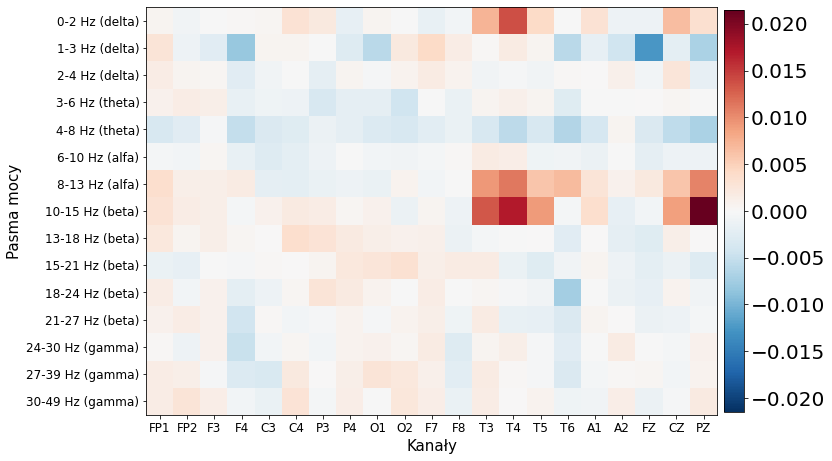

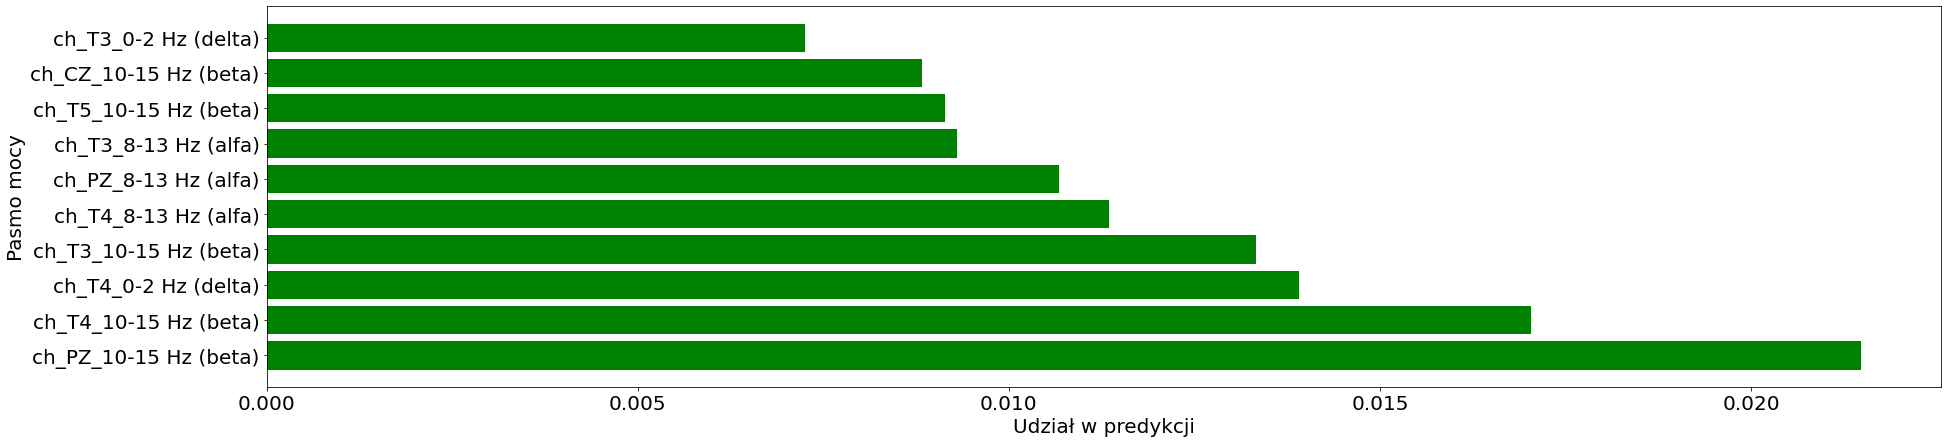

PRÓBA 1, IDX 4
data/pre/eval/abnormal/01_tcp_ar/073/00007383/s001_2010_02_25/00007383_s001_t001.h5
Case - TP, Probability for 0: 0.203125, for 1: 0.796875
4 1 1
CLINICAL HISTORY: n year old woman status post PEA code at 18:20 one day ago
with now facial twitching. History of heart failure, dementia and MI.
MEDICATIONS: Ativan, Simvastatin, Lexapro, Glipizide.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20
system of electrode placement with 1 channel of EKG. The patient is intubated and
poorly responsive. Hyperventilation and photic simulation are performed.
DESCRIPTION OF THE RECORD: The background EEG demonstrates nearly
continuous, diffuse 13 Hz beta frequency activity. Superimposed upon this, there are
some asymmetries. The left hemisphere, particularly the left posterior quadrant is more
attenuated in the left posterior quadrant. There is more beta frequency activity in the
right than the left and there is a beta accentuation at C4, T4. Tactile stimul

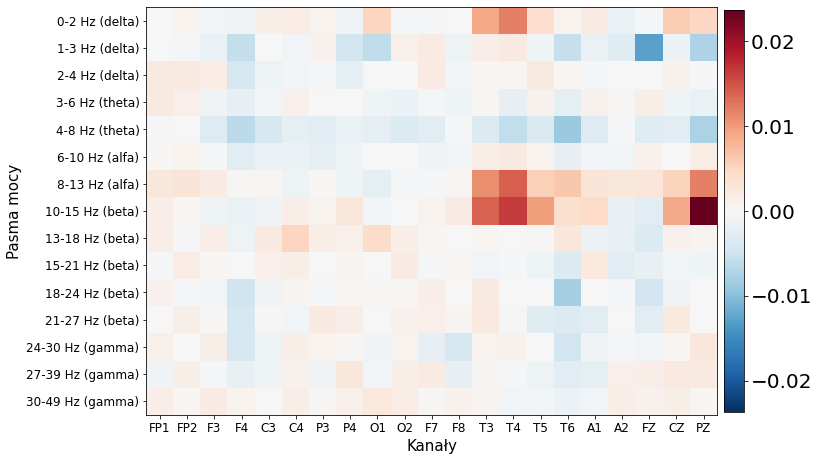

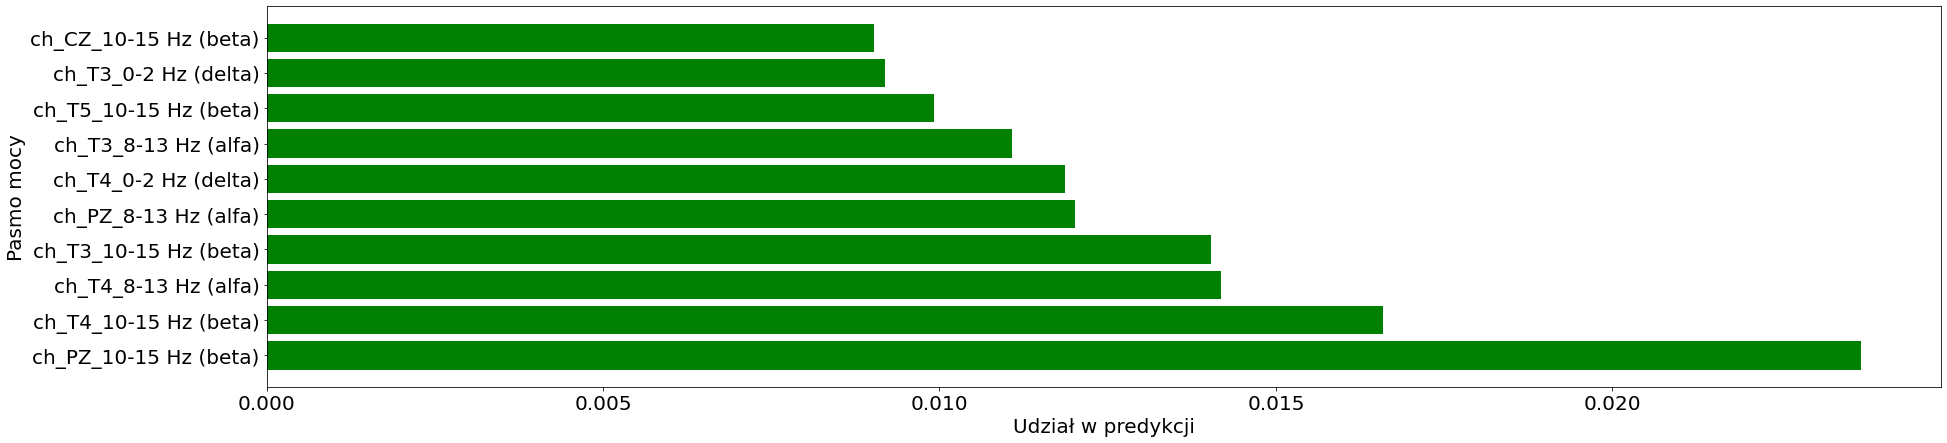

PRÓBA 2, IDX 4
data/pre/eval/abnormal/01_tcp_ar/073/00007383/s001_2010_02_25/00007383_s001_t001.h5
Case - TP, Probability for 0: 0.203125, for 1: 0.796875
4 1 1
CLINICAL HISTORY: n year old woman status post PEA code at 18:20 one day ago
with now facial twitching. History of heart failure, dementia and MI.
MEDICATIONS: Ativan, Simvastatin, Lexapro, Glipizide.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20
system of electrode placement with 1 channel of EKG. The patient is intubated and
poorly responsive. Hyperventilation and photic simulation are performed.
DESCRIPTION OF THE RECORD: The background EEG demonstrates nearly
continuous, diffuse 13 Hz beta frequency activity. Superimposed upon this, there are
some asymmetries. The left hemisphere, particularly the left posterior quadrant is more
attenuated in the left posterior quadrant. There is more beta frequency activity in the
right than the left and there is a beta accentuation at C4, T4. Tactile stimul

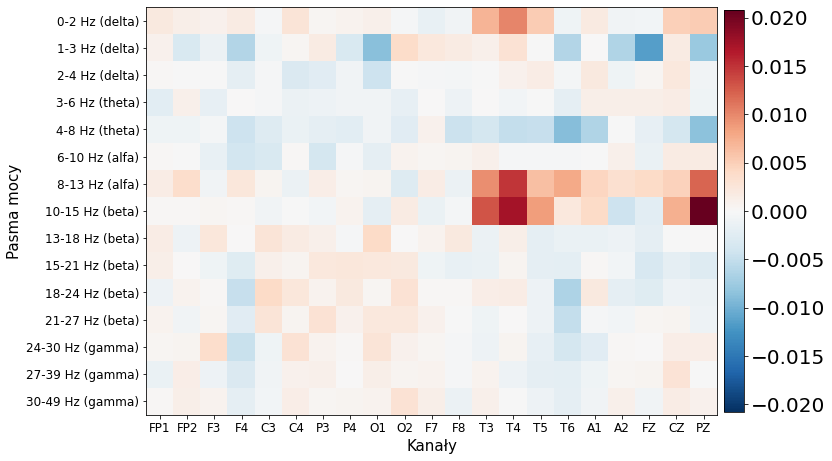

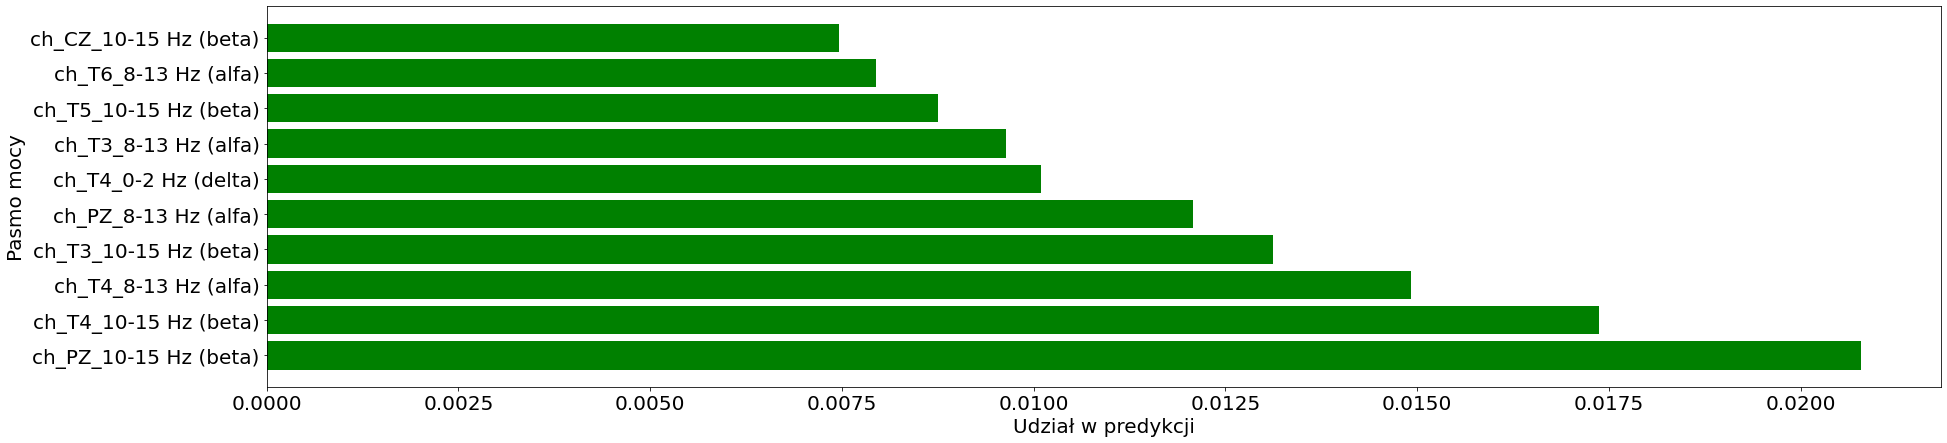

PRÓBA 3, IDX 4
data/pre/eval/abnormal/01_tcp_ar/073/00007383/s001_2010_02_25/00007383_s001_t001.h5
Case - TP, Probability for 0: 0.203125, for 1: 0.796875
4 1 1
CLINICAL HISTORY: n year old woman status post PEA code at 18:20 one day ago
with now facial twitching. History of heart failure, dementia and MI.
MEDICATIONS: Ativan, Simvastatin, Lexapro, Glipizide.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20
system of electrode placement with 1 channel of EKG. The patient is intubated and
poorly responsive. Hyperventilation and photic simulation are performed.
DESCRIPTION OF THE RECORD: The background EEG demonstrates nearly
continuous, diffuse 13 Hz beta frequency activity. Superimposed upon this, there are
some asymmetries. The left hemisphere, particularly the left posterior quadrant is more
attenuated in the left posterior quadrant. There is more beta frequency activity in the
right than the left and there is a beta accentuation at C4, T4. Tactile stimul

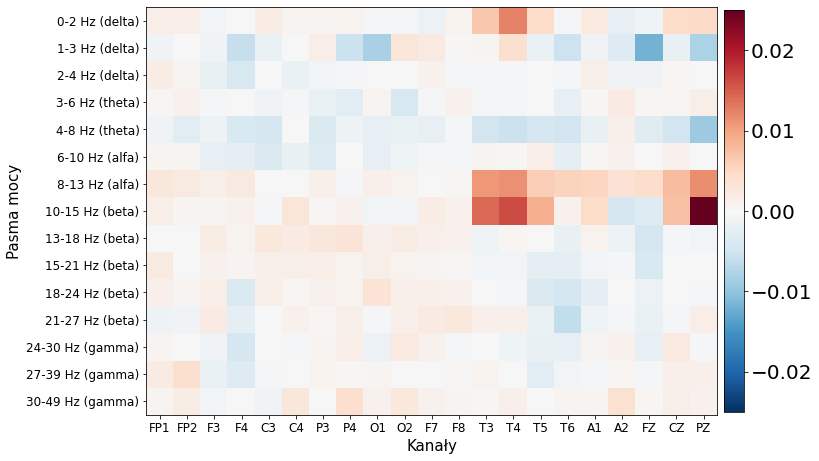

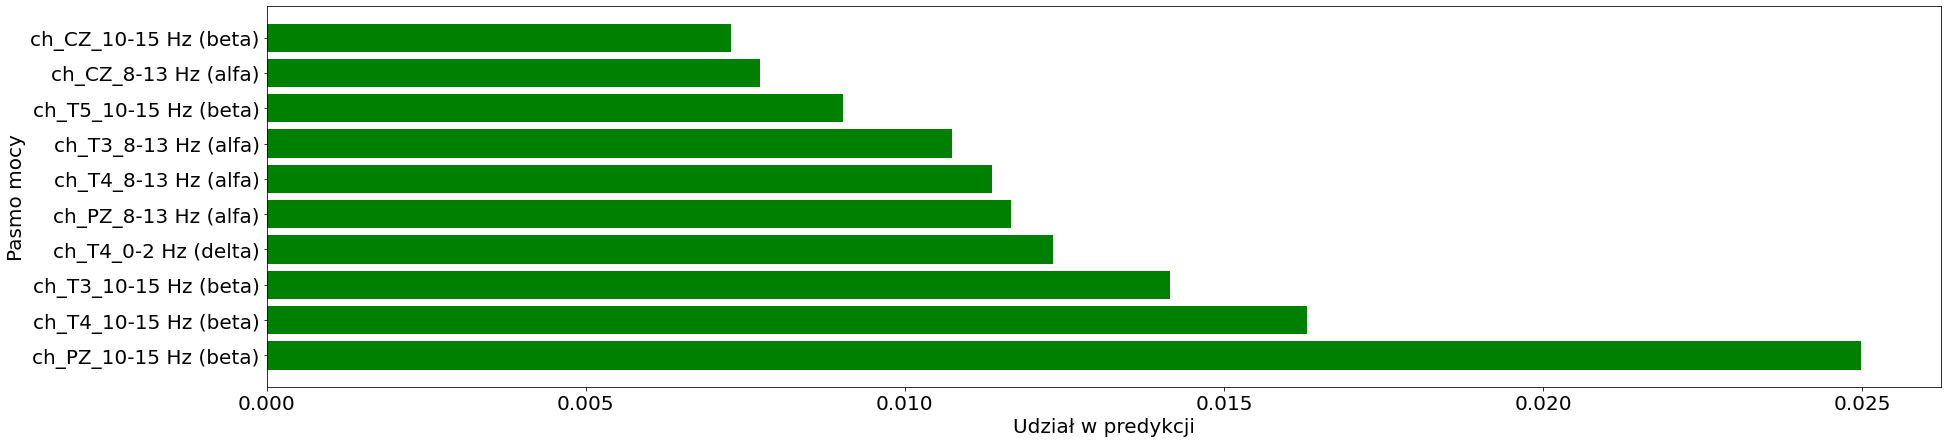

PRÓBA 0, IDX 10
data/pre/eval/abnormal/01_tcp_ar/065/00006531/s002_2010_09_09/00006531_s002_t000.h5
Case - TP, Probability for 0: 0.004375, for 1: 0.995625
10 1 1
CLINICAL HISTORY: 48 year old woman with right MCA aneurysm, status post coil, craniotomy with EBD, and right sided edema.
MEDICATIONS: Dilantin, Ativan, Keppra, Neosynephrine
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel of EKG. The patient is intubated and poorly responsive.
DESCRIPTION OF THE RECORD: The background EEG demonstrates a continuous pattern. Both hemispheres are slow, but the left hemisphere is primarily a mixture of theta with delta. The right hemisphere demonstrates more significant arrhythmic delta activity with a right frontal breech rhythm and broadly contoured left frontal sharply contoured delta. In some sections of the record, particularly the right frontal temporal there is a dramatic attenuation of beta frequency activity. On

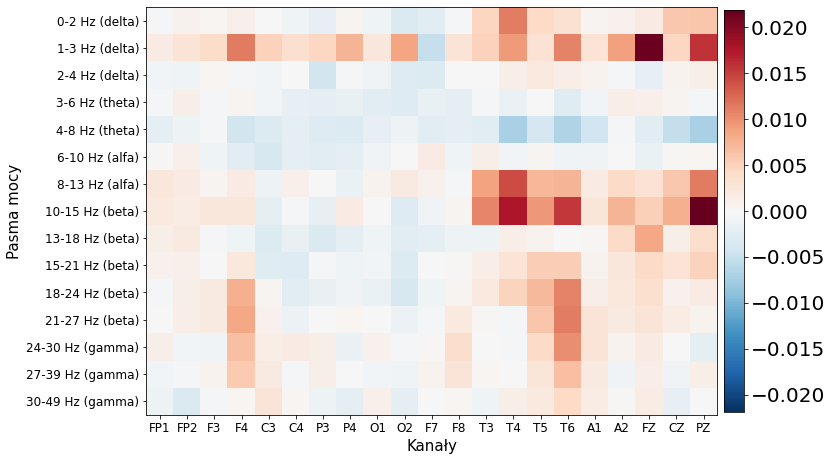

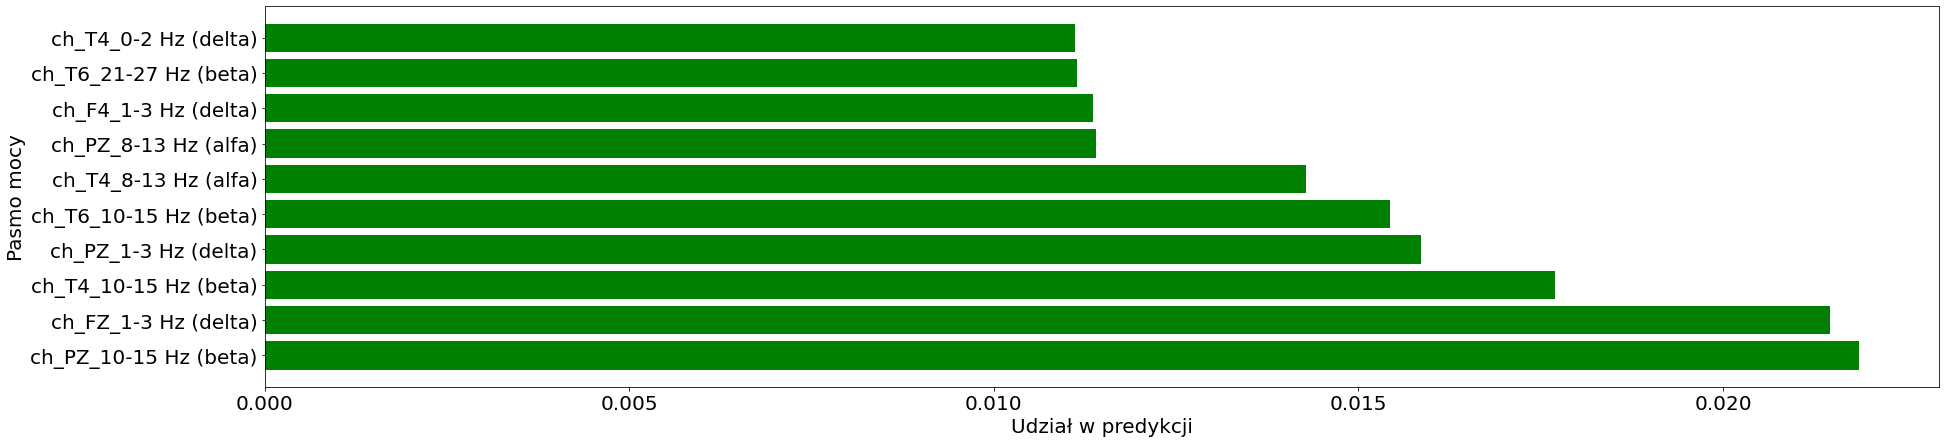

PRÓBA 1, IDX 10
data/pre/eval/abnormal/01_tcp_ar/065/00006531/s002_2010_09_09/00006531_s002_t000.h5
Case - TP, Probability for 0: 0.004375, for 1: 0.995625
10 1 1
CLINICAL HISTORY: 48 year old woman with right MCA aneurysm, status post coil, craniotomy with EBD, and right sided edema.
MEDICATIONS: Dilantin, Ativan, Keppra, Neosynephrine
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel of EKG. The patient is intubated and poorly responsive.
DESCRIPTION OF THE RECORD: The background EEG demonstrates a continuous pattern. Both hemispheres are slow, but the left hemisphere is primarily a mixture of theta with delta. The right hemisphere demonstrates more significant arrhythmic delta activity with a right frontal breech rhythm and broadly contoured left frontal sharply contoured delta. In some sections of the record, particularly the right frontal temporal there is a dramatic attenuation of beta frequency activity. On

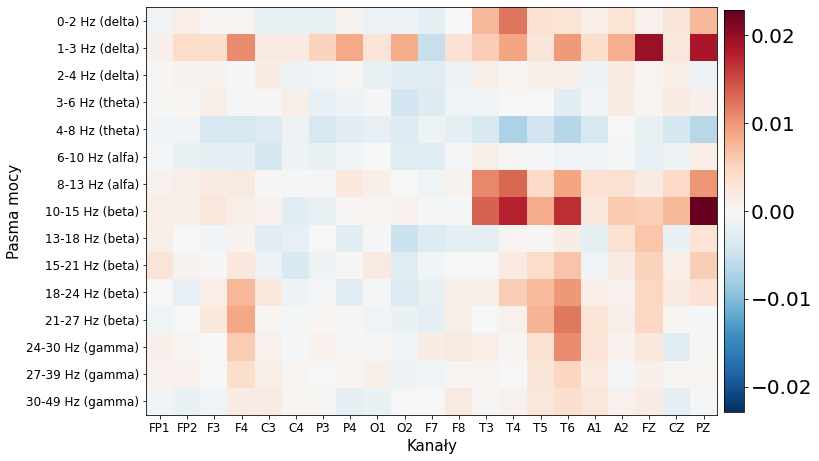

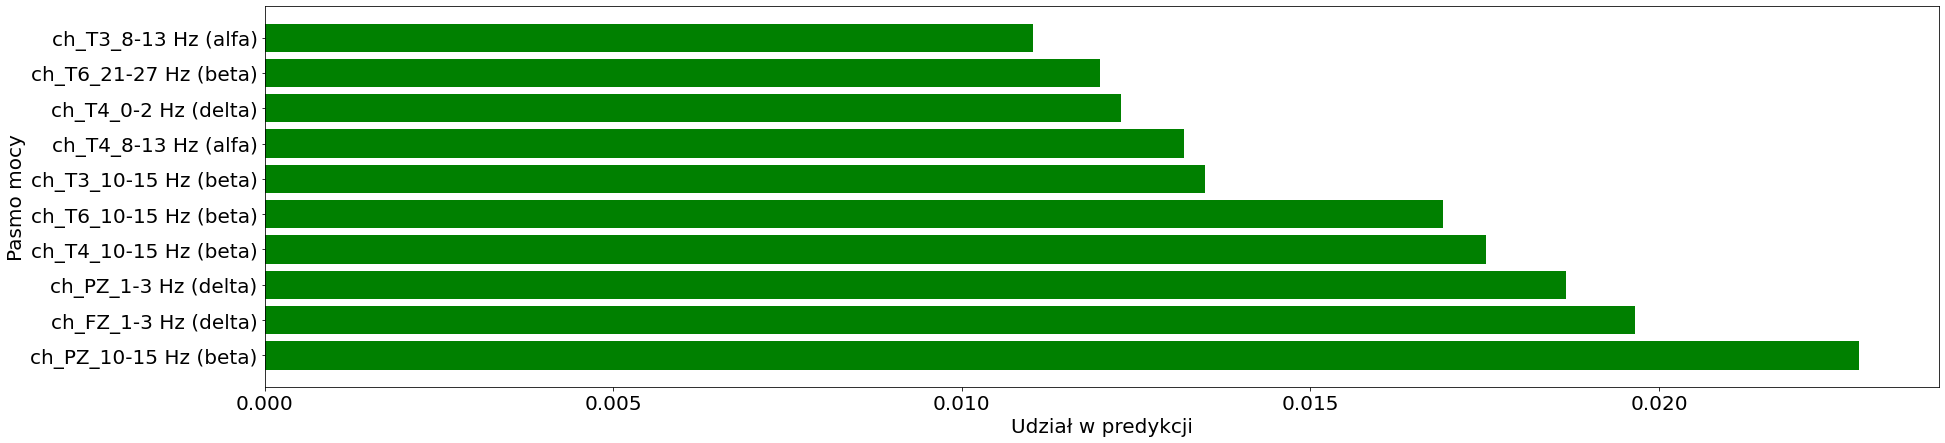

PRÓBA 2, IDX 10
data/pre/eval/abnormal/01_tcp_ar/065/00006531/s002_2010_09_09/00006531_s002_t000.h5
Case - TP, Probability for 0: 0.004375, for 1: 0.995625
10 1 1
CLINICAL HISTORY: 48 year old woman with right MCA aneurysm, status post coil, craniotomy with EBD, and right sided edema.
MEDICATIONS: Dilantin, Ativan, Keppra, Neosynephrine
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel of EKG. The patient is intubated and poorly responsive.
DESCRIPTION OF THE RECORD: The background EEG demonstrates a continuous pattern. Both hemispheres are slow, but the left hemisphere is primarily a mixture of theta with delta. The right hemisphere demonstrates more significant arrhythmic delta activity with a right frontal breech rhythm and broadly contoured left frontal sharply contoured delta. In some sections of the record, particularly the right frontal temporal there is a dramatic attenuation of beta frequency activity. On

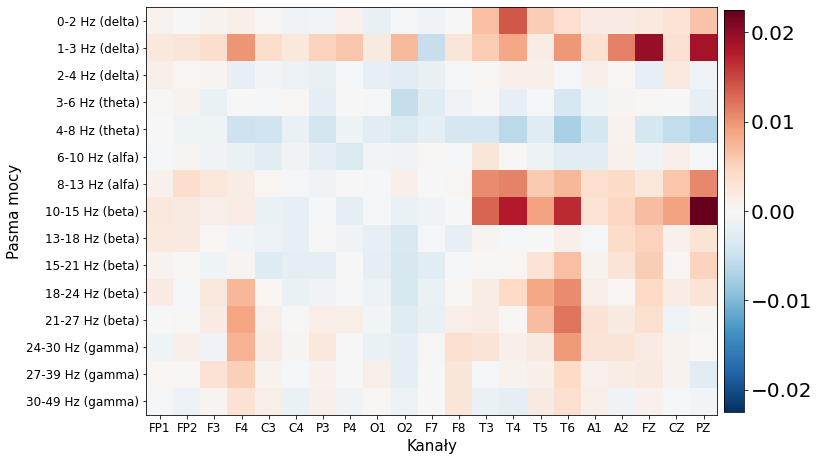

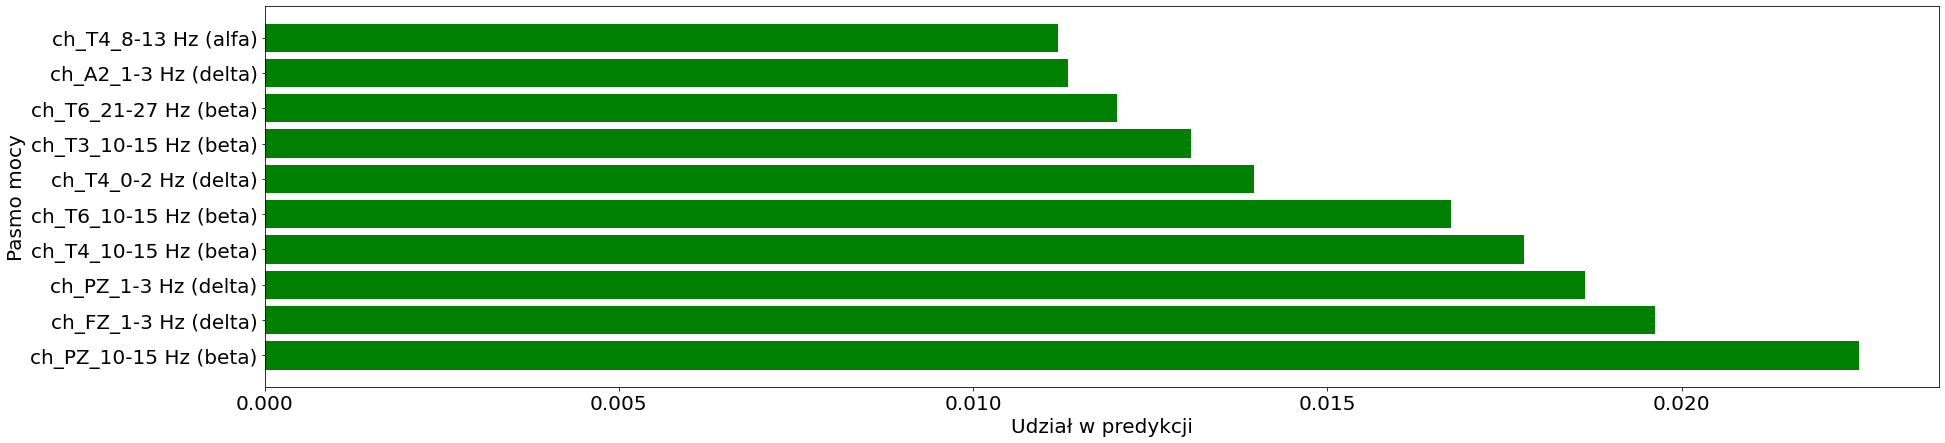

PRÓBA 3, IDX 10
data/pre/eval/abnormal/01_tcp_ar/065/00006531/s002_2010_09_09/00006531_s002_t000.h5
Case - TP, Probability for 0: 0.004375, for 1: 0.995625
10 1 1
CLINICAL HISTORY: 48 year old woman with right MCA aneurysm, status post coil, craniotomy with EBD, and right sided edema.
MEDICATIONS: Dilantin, Ativan, Keppra, Neosynephrine
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel of EKG. The patient is intubated and poorly responsive.
DESCRIPTION OF THE RECORD: The background EEG demonstrates a continuous pattern. Both hemispheres are slow, but the left hemisphere is primarily a mixture of theta with delta. The right hemisphere demonstrates more significant arrhythmic delta activity with a right frontal breech rhythm and broadly contoured left frontal sharply contoured delta. In some sections of the record, particularly the right frontal temporal there is a dramatic attenuation of beta frequency activity. On

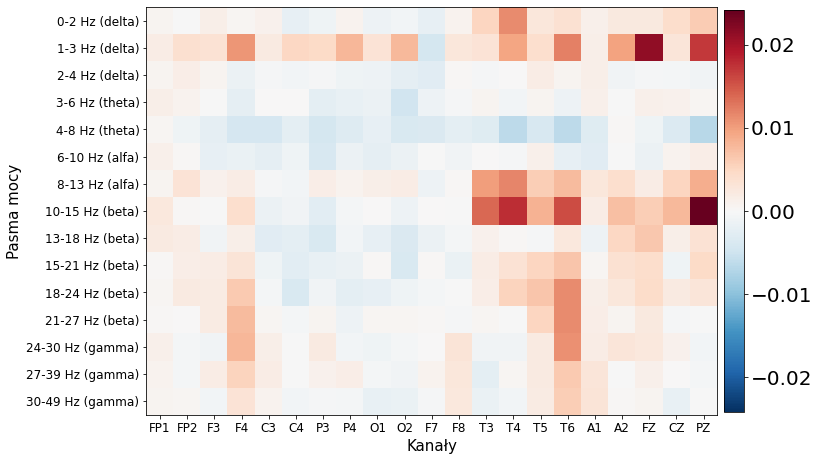

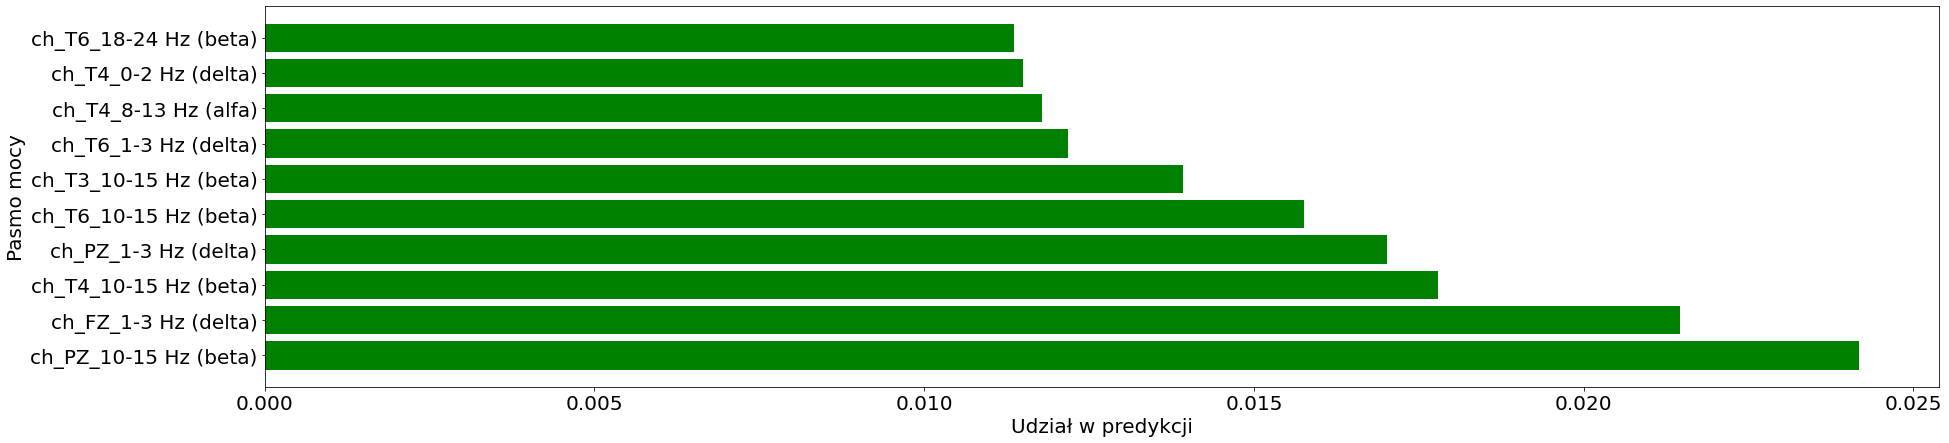

PRÓBA 0, IDX 6
data/pre/eval/normal/01_tcp_ar/063/00006312/s001_2009_11_19/00006312_s001_t000.h5
Case - FP, Probability for 0: 0.01375, for 1: 0.98625
6 1 0
CLINICAL HISTORY:  52 year old right handed woman with a loss of consciousness this past Monday, hypersomnolence today prior to thyroidectomy. Ongoing confusion.
MEDICATIONS: Ventolin, Albuterol.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel EKG.
DESCRIPTION OF THE RECORD:  The majority of the record includes stage II  sleep with vertex, K complexes and spindles.  Little testing is performed to assess for cognitive testing.  The patient is stimulated and when she is awake, the background includes a well-defined, 9.5 Hz alpha rhythm.
HR:	84 bpm
IMPRESSION:  Normal EEG.
CLINICAL CORRELATION:  This EEG demonstrates an excessively sleepy individual but normal awake through stage II sleep.  Morphology or wave forms are noted. Additional evaluation for the cause

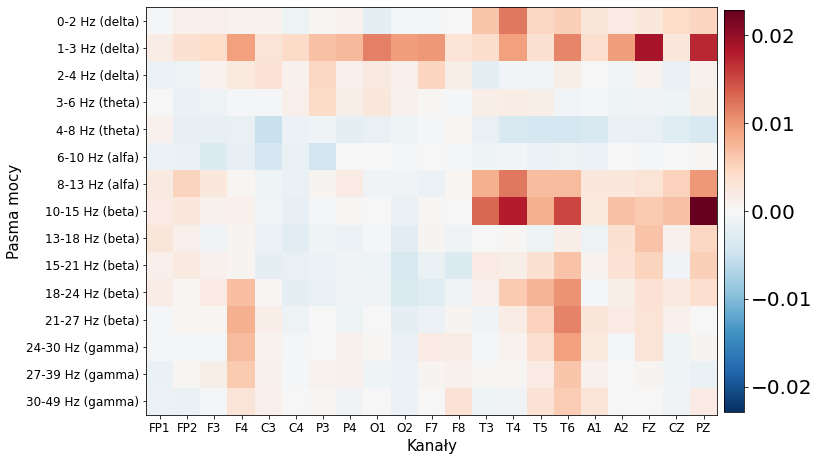

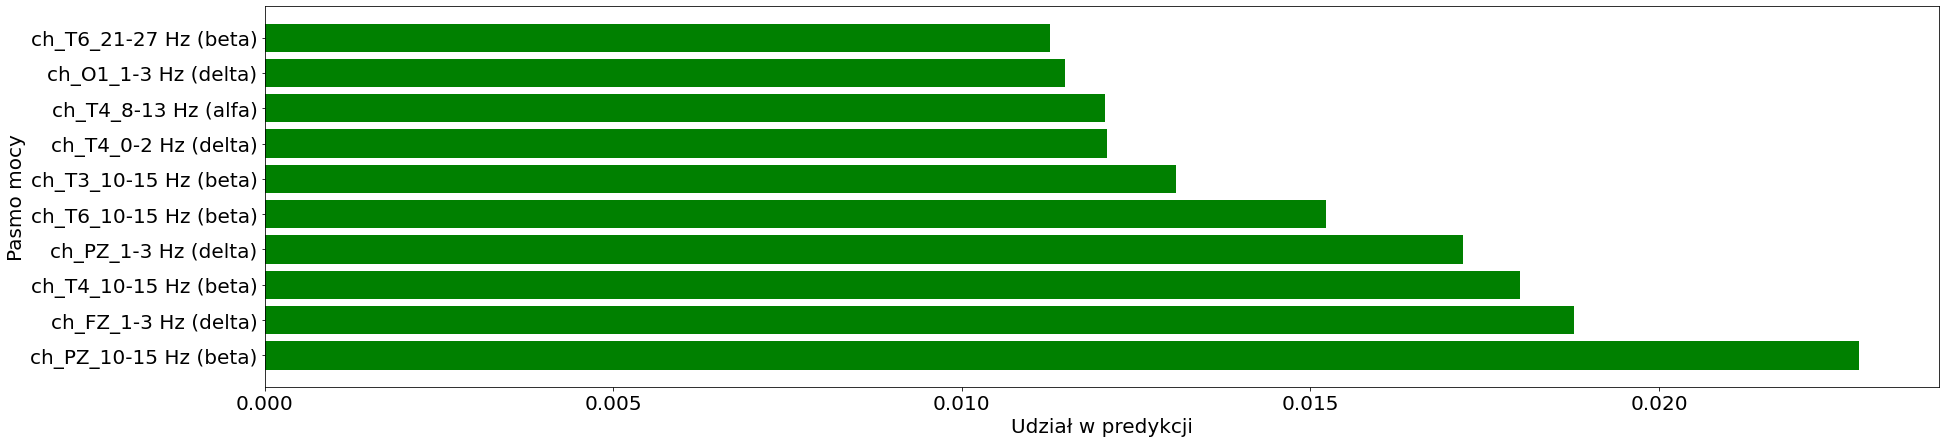

PRÓBA 1, IDX 6
data/pre/eval/normal/01_tcp_ar/063/00006312/s001_2009_11_19/00006312_s001_t000.h5
Case - FP, Probability for 0: 0.01375, for 1: 0.98625
6 1 0
CLINICAL HISTORY:  52 year old right handed woman with a loss of consciousness this past Monday, hypersomnolence today prior to thyroidectomy. Ongoing confusion.
MEDICATIONS: Ventolin, Albuterol.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel EKG.
DESCRIPTION OF THE RECORD:  The majority of the record includes stage II  sleep with vertex, K complexes and spindles.  Little testing is performed to assess for cognitive testing.  The patient is stimulated and when she is awake, the background includes a well-defined, 9.5 Hz alpha rhythm.
HR:	84 bpm
IMPRESSION:  Normal EEG.
CLINICAL CORRELATION:  This EEG demonstrates an excessively sleepy individual but normal awake through stage II sleep.  Morphology or wave forms are noted. Additional evaluation for the cause

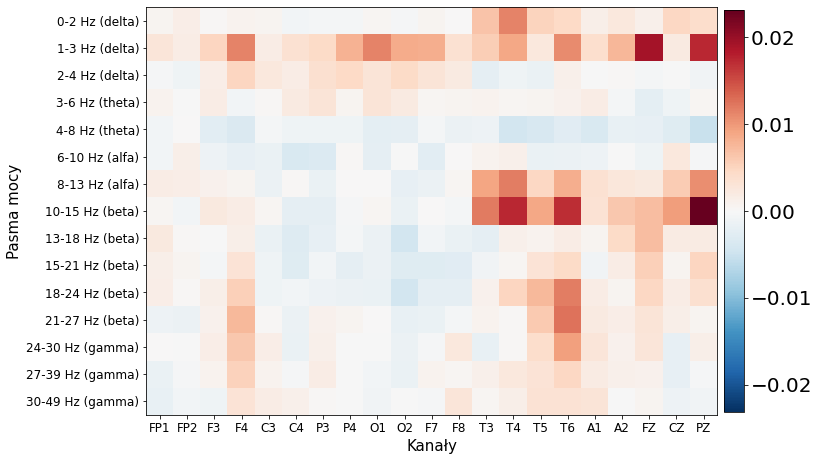

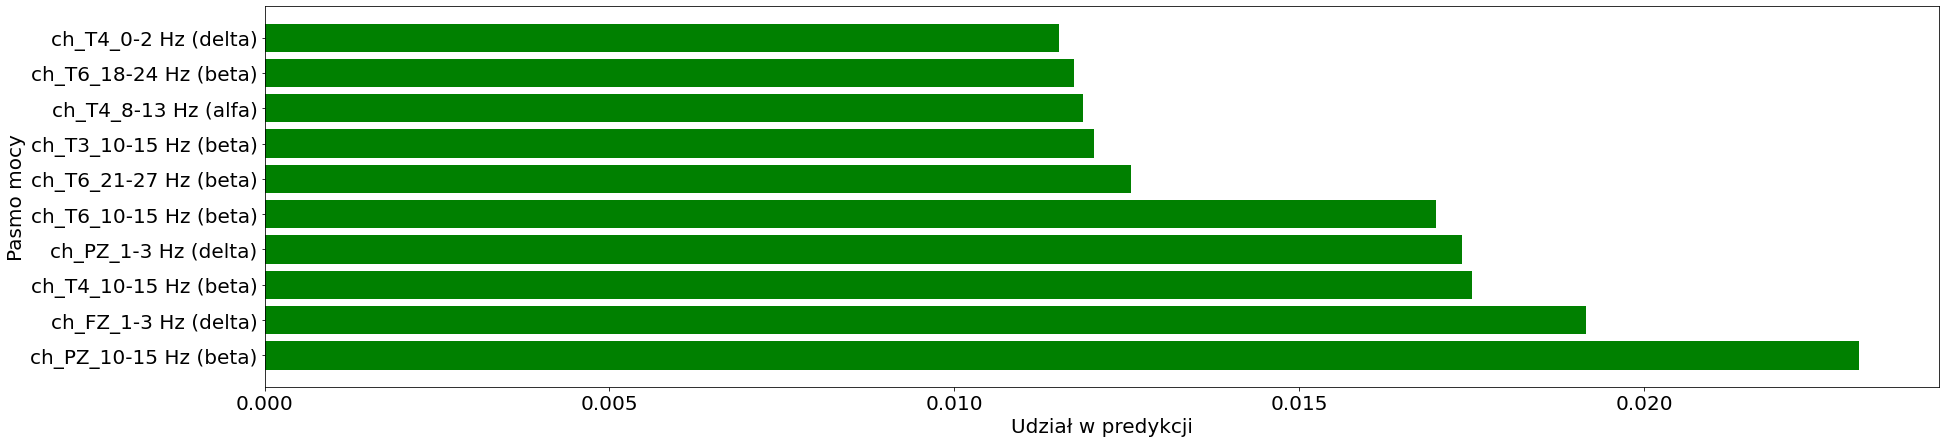

PRÓBA 2, IDX 6
data/pre/eval/normal/01_tcp_ar/063/00006312/s001_2009_11_19/00006312_s001_t000.h5
Case - FP, Probability for 0: 0.01375, for 1: 0.98625
6 1 0
CLINICAL HISTORY:  52 year old right handed woman with a loss of consciousness this past Monday, hypersomnolence today prior to thyroidectomy. Ongoing confusion.
MEDICATIONS: Ventolin, Albuterol.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel EKG.
DESCRIPTION OF THE RECORD:  The majority of the record includes stage II  sleep with vertex, K complexes and spindles.  Little testing is performed to assess for cognitive testing.  The patient is stimulated and when she is awake, the background includes a well-defined, 9.5 Hz alpha rhythm.
HR:	84 bpm
IMPRESSION:  Normal EEG.
CLINICAL CORRELATION:  This EEG demonstrates an excessively sleepy individual but normal awake through stage II sleep.  Morphology or wave forms are noted. Additional evaluation for the cause

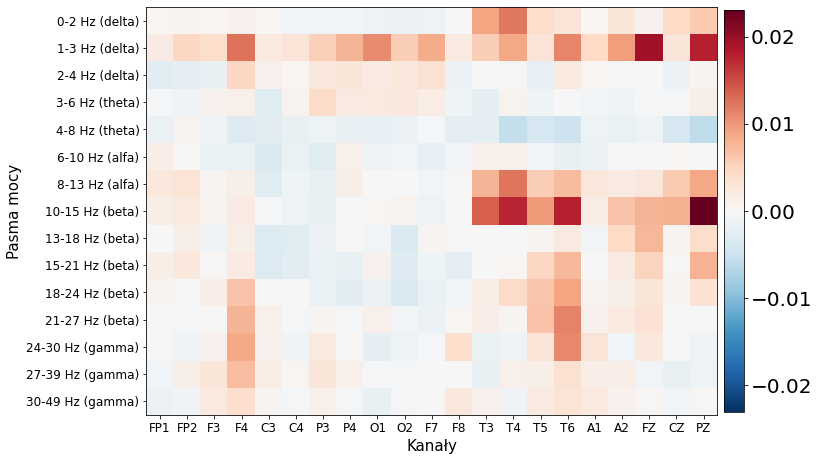

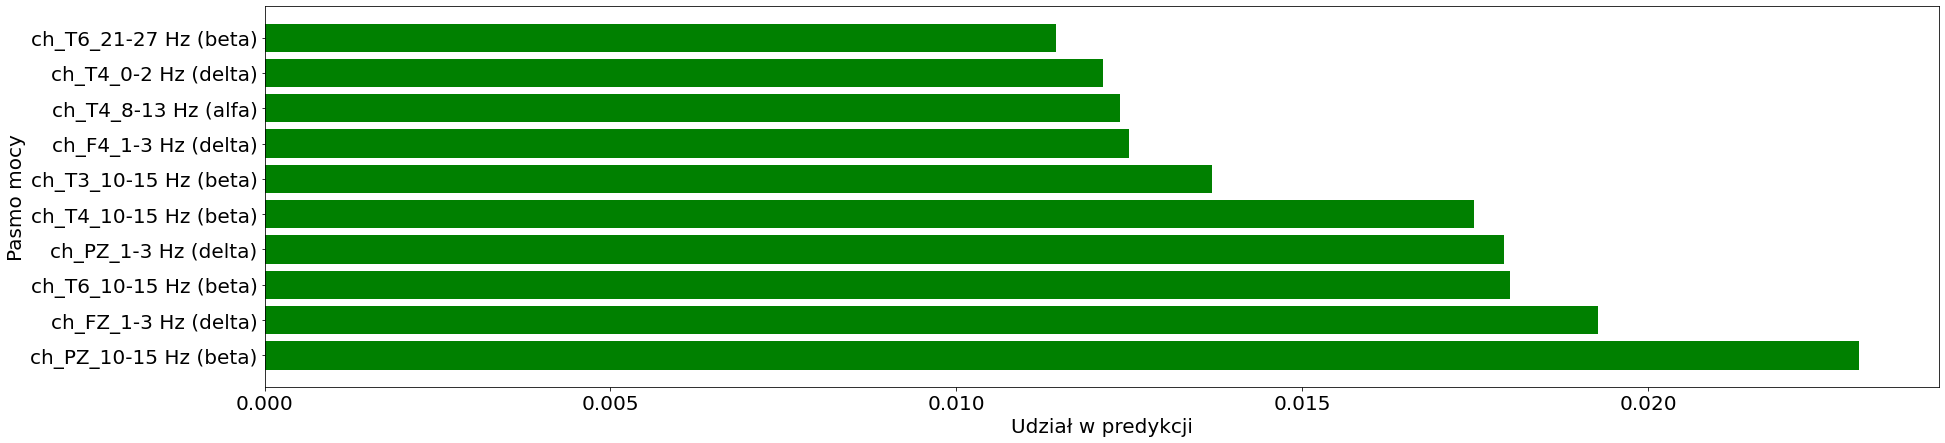

PRÓBA 3, IDX 6
data/pre/eval/normal/01_tcp_ar/063/00006312/s001_2009_11_19/00006312_s001_t000.h5
Case - FP, Probability for 0: 0.01375, for 1: 0.98625
6 1 0
CLINICAL HISTORY:  52 year old right handed woman with a loss of consciousness this past Monday, hypersomnolence today prior to thyroidectomy. Ongoing confusion.
MEDICATIONS: Ventolin, Albuterol.
INTRODUCTION: Digital video EEG was performed at bedside using standard 10-20 system of electrode placement with 1 channel EKG.
DESCRIPTION OF THE RECORD:  The majority of the record includes stage II  sleep with vertex, K complexes and spindles.  Little testing is performed to assess for cognitive testing.  The patient is stimulated and when she is awake, the background includes a well-defined, 9.5 Hz alpha rhythm.
HR:	84 bpm
IMPRESSION:  Normal EEG.
CLINICAL CORRELATION:  This EEG demonstrates an excessively sleepy individual but normal awake through stage II sleep.  Morphology or wave forms are noted. Additional evaluation for the cause

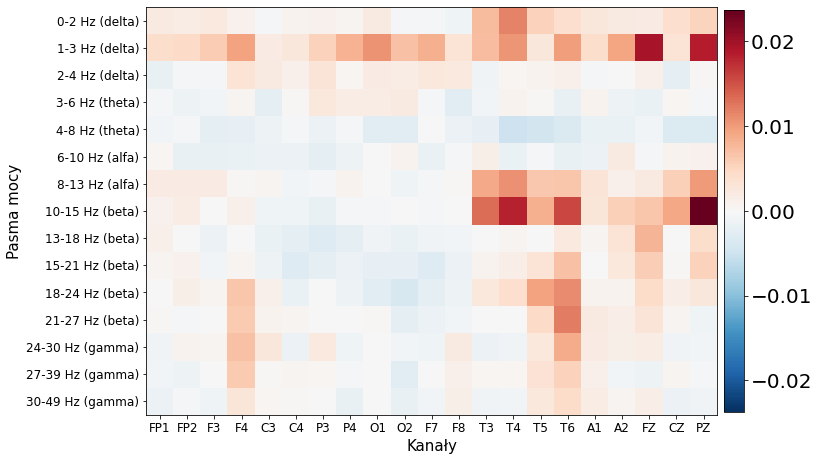

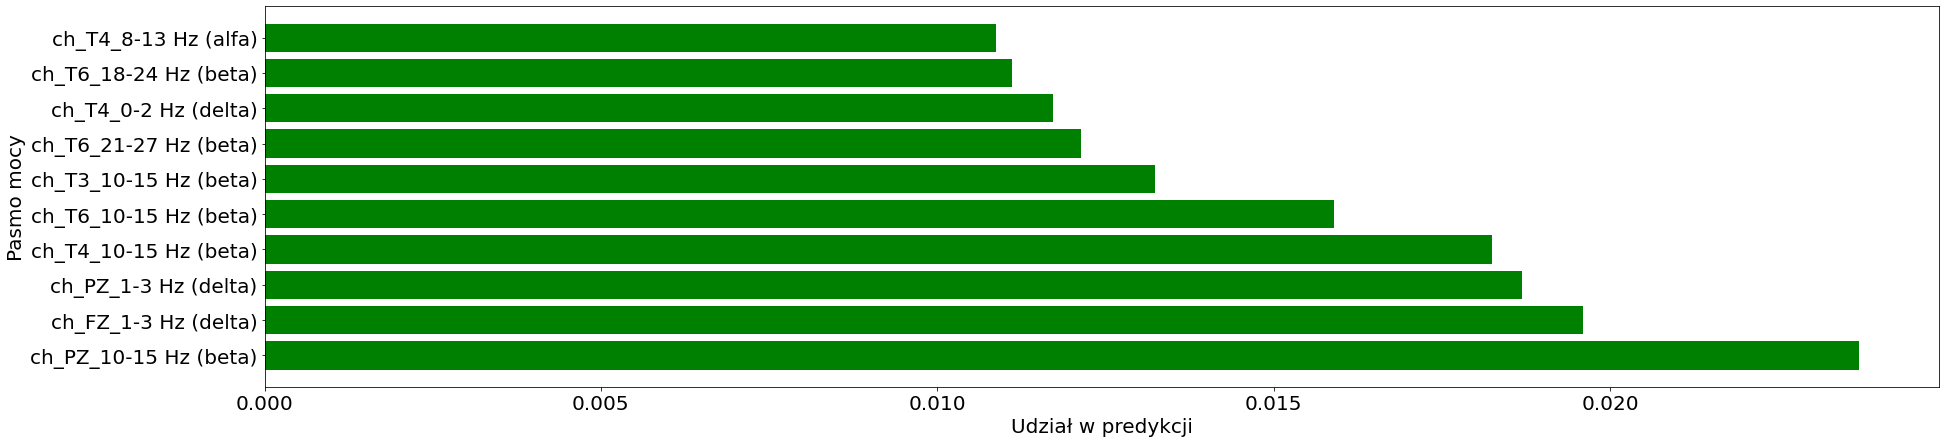

In [22]:
def TP(pred, true):
    return (pred == 1) * (true == 1)

def FP(pred, true):
    return (pred == 1) * (true == 0)

def TN(pred, true):
    return (pred == 0) * (true == 0)

def FN(pred, true):
    return (pred == 0) * (true == 1)

D = {'TP': (TP, [4, 10]), 'FP': (FP, [6]), 'TN': (TN, []), 'FN': (FN, [])}
sc = 1
type = 'lime'
res_path = f'img/'

clf_eval_exp = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['normal', 'abnormal'],
    mode='classification',
    feature_selection='lasso_path',
    
)
for met, [fun, IDX] in D.items():
    sh = 1
    probs_met = probs[fun(preds, Y_eval)]
    Y_met = Y_eval[fun(preds, Y_eval)]
    Y_eval_all_met = Y_eval_all[fun(preds, Y_eval)]
    X_eval_met = X_eval.loc[fun(preds, Y_eval)].reset_index().drop('index', axis=1)
    preds_met = preds[fun(preds, Y_eval)]
    idx_sort = np.argsort(probs_met[:, sh])[::-1]
    
    for idx in IDX:
        for i in range(4):
            print(f"PRÓBA {i}, IDX {idx}")
            prob = probs_met[idx]

            print(Y_eval_all_met[idx, 9])
            spli_path = Path(Y_eval_all_met[idx, 9]).parts
            with open(f'data/sub_{spli_path[6]}_{spli_path[5]}.txt', 'r') as f:
                desc = f.read()
            print(f"Case - {met}, Probability for 0: {prob[0]}, for 1: {prob[1]}")
            print(idx, preds_met[idx], Y_met[idx])
            print(desc)


            sick = X_eval_met.loc[idx]

            F = np.zeros((len(BAND_LIMITS), len(ch_names)))
            S = F.copy()

            t0 = time.time()
            sub = clf_eval_exp.explain_instance(data_row=np.array(sick), predict_fn=clf_eval.predict_proba, num_features=len(X_train.columns))
            print(f'{(time.time() - t0) / 60} min')

            sub_map = pd.DataFrame(sub.as_map()[1], columns=['idx', 'contr'])
            sub_map['name'] = np.array(X_eval.columns)[sub_map.idx]

            for idx_ch, ch in enumerate(ch_names):
                for idx_b, [l, h, n] in enumerate(BAND_LIMITS):
                    name = f'ch_{ch}_{l}-{h} Hz ({n})'
                    try:
                        F[idx_b, idx_ch] = sub_map.contr[sub_map.name == name]
                    except ValueError:
                        F[idx_b, idx_ch] = 0


            plt.figure(figsize=(sc*12, sc*7.5))
            clim = np.max(np.abs(F))
            plt.imshow(F, cmap = 'RdBu_r', vmin=-clim, vmax=clim)
            plt.xticks(np.arange(0, len(ch_names)), ch_names, fontsize=12*sc)
            plt.yticks(np.arange(0, len(BAND_LIMITS)), (f'{int(l)}-{int(h)} Hz ({n})' for l, h, n in BAND_LIMITS), fontsize=12*sc)
            plt.xlabel("Kanały", fontsize=15*sc)
            plt.ylabel("Pasma mocy", fontsize=15*sc)
            plt.colorbar(fraction=0.03, pad=0.01)
            
            if i == 0:
                plt.savefig(res_path + f'sub_{spli_path[6]}_{spli_path[5]}.png')
            plt.show()

            N = 10
            top_contr = sub_map.nlargest(n=N, columns=['contr'])
            sc = 1
            y_pos = np.arange(N)
            plt.figure(figsize=(sc*30, sc*7))
            plt.barh(y_pos, top_contr.contr, color=["red" if contr<0 else "green" for contr in top_contr.contr])
            plt.yticks(y_pos, top_contr.name)
            plt.ylabel("Pasmo mocy")
            plt.xlabel("Udział w predykcji")

            if i == 0:
                plt.savefig(res_path + f'sub_{spli_path[6]}_{spli_path[5]}_bar.png')
            plt.show()